In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [2]:
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high= 180, size = 1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


625

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | long xuyen
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | skjervoy
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | lira
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | borskoye
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | los llanos de aridane
Processing Record 16 of Set 1 | tomatlan
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | merauke
Processing Record 22 of Set 1 | mys s

Processing Record 34 of Set 4 | saleaula
City not found. Skipping...
Processing Record 35 of Set 4 | santa helena de goias
Processing Record 36 of Set 4 | bereda
Processing Record 37 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 4 | langsa
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | bacuit
City not found. Skipping...
Processing Record 43 of Set 4 | sisimiut
Processing Record 44 of Set 4 | chardara
Processing Record 45 of Set 4 | bontang
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | adrar
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | severo-yeniseyskiy
Processing Record 2 of Set 5 | chicama
Processing Record 3 of Set 5 | barillas
Processing Record 4 of Set 5 | mocuba
Processing Record 5 of Set 5 | skagastrond
City no

Processing Record 24 of Set 8 | robertsport
Processing Record 25 of Set 8 | chagda
City not found. Skipping...
Processing Record 26 of Set 8 | aksarka
Processing Record 27 of Set 8 | saint-augustin
Processing Record 28 of Set 8 | conde
Processing Record 29 of Set 8 | hirara
Processing Record 30 of Set 8 | baghdad
Processing Record 31 of Set 8 | barawe
City not found. Skipping...
Processing Record 32 of Set 8 | mastic beach
Processing Record 33 of Set 8 | chapais
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | karoi
Processing Record 36 of Set 8 | bougouni
Processing Record 37 of Set 8 | erenhot
Processing Record 38 of Set 8 | fortuna
Processing Record 39 of Set 8 | savinka
Processing Record 40 of Set 8 | krasnoselkup
Processing Record 41 of Set 8 | oktyabrskoye
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | pocatello
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | faanui
Processing Record 46 of Set 8 | kokkola

Processing Record 11 of Set 12 | kumano
Processing Record 12 of Set 12 | makali
Processing Record 13 of Set 12 | shitanjing
Processing Record 14 of Set 12 | qaqortoq
Processing Record 15 of Set 12 | hay river
Processing Record 16 of Set 12 | bolgatanga
Processing Record 17 of Set 12 | rocha
Processing Record 18 of Set 12 | olinda
Processing Record 19 of Set 12 | atambua
Processing Record 20 of Set 12 | safford
Processing Record 21 of Set 12 | nuuk
Processing Record 22 of Set 12 | leningradskiy
Processing Record 23 of Set 12 | tocopilla
Processing Record 24 of Set 12 | lugo
Processing Record 25 of Set 12 | alice
Processing Record 26 of Set 12 | darhan
Processing Record 27 of Set 12 | san antonio
Processing Record 28 of Set 12 | mendahara
City not found. Skipping...
Processing Record 29 of Set 12 | maceio
Processing Record 30 of Set 12 | saint-philippe
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | wukari
Processing Record 33 of Set 12 | mehamn
Processing Reco

In [7]:
len(city_data)

574

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Long Xuyen,10.3833,105.4167,82.40,89,20,2.30,VN,2021-04-02 17:37:56
1,Kaitangata,-46.2817,169.8464,40.86,91,44,5.50,NZ,2021-04-02 17:37:56
2,Rikitea,-23.1203,-134.9692,76.73,79,93,11.39,PF,2021-04-02 17:37:57
3,Skjervoy,70.0311,20.9714,36.75,96,100,32.57,NO,2021-04-02 17:37:57
4,Port Alfred,-33.5906,26.8910,63.05,80,100,14.97,ZA,2021-04-02 17:37:57
...,...,...,...,...,...,...,...,...,...
569,Puerto Baquerizo Moreno,-0.9000,-89.6000,82.40,78,40,5.75,EC,2021-04-02 17:41:22
570,Sainte-Maxime,43.3000,6.6333,66.20,63,1,8.05,FR,2021-04-02 17:41:23
571,Erzin,36.9559,36.2000,54.00,82,100,1.86,TR,2021-04-02 17:41:23
572,Pleasanton,37.6624,-121.8747,66.99,40,15,3.56,US,2021-04-02 17:39:44


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Long Xuyen,VN,2021-04-02 17:37:56,10.3833,105.4167,82.40,89,20,2.30
1,Kaitangata,NZ,2021-04-02 17:37:56,-46.2817,169.8464,40.86,91,44,5.50
2,Rikitea,PF,2021-04-02 17:37:57,-23.1203,-134.9692,76.73,79,93,11.39
3,Skjervoy,NO,2021-04-02 17:37:57,70.0311,20.9714,36.75,96,100,32.57
4,Port Alfred,ZA,2021-04-02 17:37:57,-33.5906,26.8910,63.05,80,100,14.97
...,...,...,...,...,...,...,...,...,...
569,Puerto Baquerizo Moreno,EC,2021-04-02 17:41:22,-0.9000,-89.6000,82.40,78,40,5.75
570,Sainte-Maxime,FR,2021-04-02 17:41:23,43.3000,6.6333,66.20,63,1,8.05
571,Erzin,TR,2021-04-02 17:41:23,36.9559,36.2000,54.00,82,100,1.86
572,Pleasanton,US,2021-04-02 17:39:44,37.6624,-121.8747,66.99,40,15,3.56


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
max_temps

0      82.40
1      40.86
2      76.73
3      36.75
4      63.05
       ...  
569    82.40
570    66.20
571    54.00
572    66.99
573    83.43
Name: Max Temp, Length: 574, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

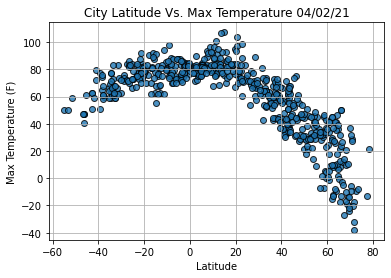

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths= 1, marker= "o",
           alpha= 0.8,
           label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude Vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show

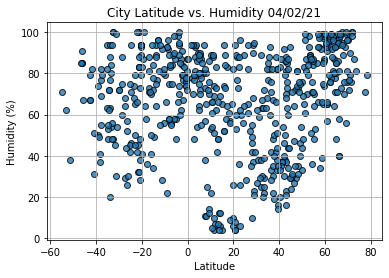

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

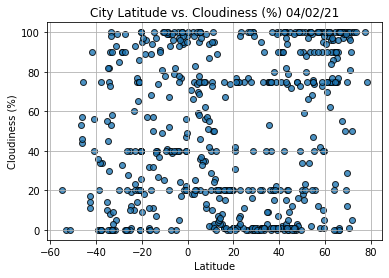

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

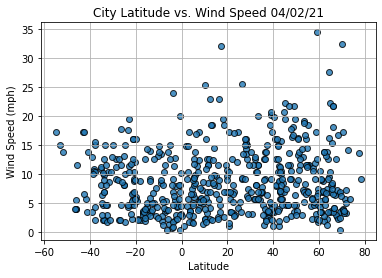

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Long Xuyen,VN,2021-04-02 17:37:56,10.3833,105.4167,82.40,89,20,2.30
3,Skjervoy,NO,2021-04-02 17:37:57,70.0311,20.9714,36.75,96,100,32.57
5,Ostrovnoy,RU,2021-04-02 17:37:57,68.0531,39.5131,21.09,95,97,2.59
8,Lira,UG,2021-04-02 17:37:58,2.2350,32.9097,71.56,70,100,4.54
10,Borskoye,RU,2021-04-02 17:37:59,53.0333,51.7167,33.28,93,34,12.93
...,...,...,...,...,...,...,...,...,...
568,Santa Pola,ES,2021-04-02 17:41:22,38.1917,-0.5658,73.00,56,20,3.44
570,Sainte-Maxime,FR,2021-04-02 17:41:23,43.3000,6.6333,66.20,63,1,8.05
571,Erzin,TR,2021-04-02 17:41:23,36.9559,36.2000,54.00,82,100,1.86
572,Pleasanton,US,2021-04-02 17:39:44,37.6624,-121.8747,66.99,40,15,3.56


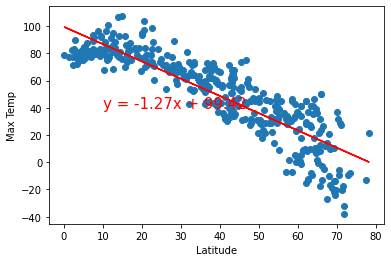

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

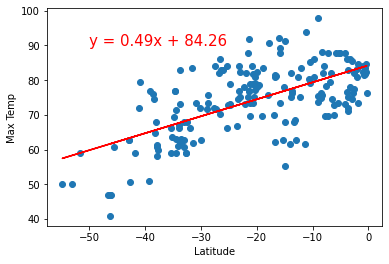

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

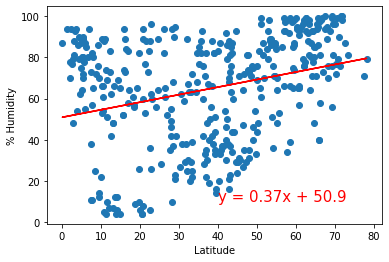

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

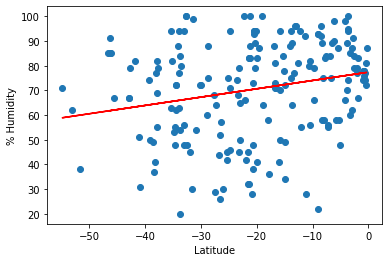

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

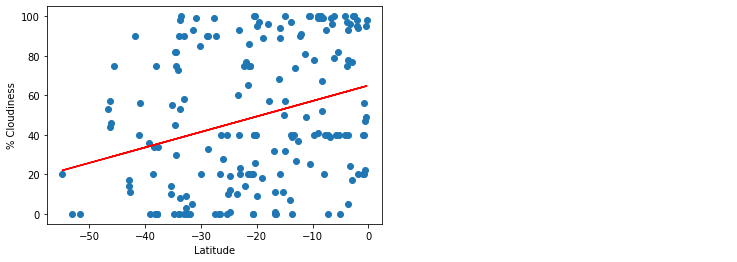

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(40,35))

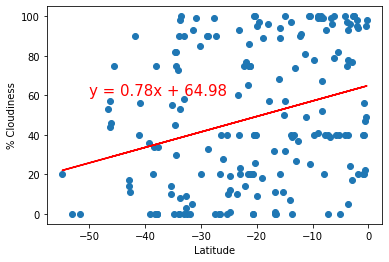

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

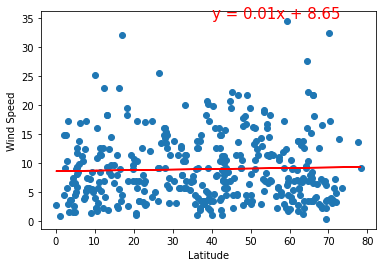

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


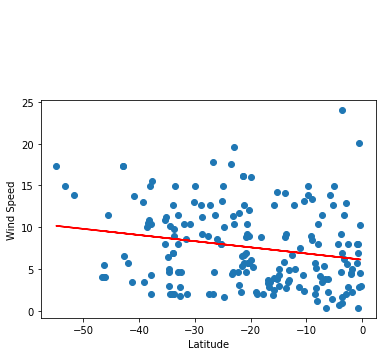

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))